# Creating bell like shape using numpy, sympy

In [84]:
import numpy as np

In [85]:
import matplotlib.pyplot as plt

In [86]:
import sympy

Horn bell has some fixed boundary condition like below.

In [87]:
df = 300 # large end diameter
db = 16  # small end diameter
xL = 850 # length

To find adequate function that express bell diameter along with axis length, some symbols are needed.

In [88]:
a,b,c,x,p = sympy.symbols('a b c x p')

Looking from large end, bell must be monotominally decreasing.
One of such function is written by following expression.

In [89]:
f = a/(x+b)**p + c

At very beginning, bell edge has some tangent angle.

In [90]:
f1 = sympy.diff(f,x)

In [91]:
l1 = f1.subs(x,0);
l1

-a*p/(b*b**p)

Let it be 80 degree on actual geometry.

In [92]:
# set initial df = 2*tan(-80 deg)
eq1 = sympy.Eq(l1,2*np.tan(-80/180*np.pi));
eq1

Eq(-a*p/(b*b**p), -11.3425636392354)

Solve this equation to eliminate constant a.

In [93]:
a1 = sympy.solve(eq1,a);
a1

[11.3425636392354*b**(p + 1)/p]

Then function is written as follows.

In [94]:
f2 = f.subs(a,a1[0]);
f2

11.3425636392354*b**(p + 1)/(p*(b + x)**p) + c

2nd condition is larger end diameter.

In [95]:
# initial diameter condition
eq2 = sympy.Eq(f2.subs(x,0),df);
eq2

Eq(c + 11.3425636392354*b**(p + 1)/(b**p*p), 300)

We can eliminate constant c from this equation.

In [96]:
a2 = sympy.solve(eq2,c);
a2

[-11.3425636392354*b/p + 300.0]

Function is now below.

In [97]:
f3 = f2.subs(c,a2[0]);
f3

-11.3425636392354*b/p + 11.3425636392354*b**(p + 1)/(p*(b + x)**p) + 300.0

3rd condition is at smaller end.

In [98]:
# 2nd diameter condition at x = xL
eq3 = sympy.Eq(f3.subs(x,xL),db);
eq3

Eq(-11.3425636392354*b/p + 11.3425636392354*b**(p + 1)/(p*(b + 850)**p) + 300.0, 16)

Since this equation cannnot be solved analytically, we need to assume p, then solve it numerically.

In [99]:
# this is not solved mathematically.
# set p for try and error.

p0 = 1
f4 = f3.subs(p,p0).subs(x,xL) - db;
f4

11.3425636392354*b**2/(b + 850) - 11.3425636392354*b + 284.0

Numeric solution for constant b is,

In [100]:
a5 = sympy.nsolve(f4,-1);
a5

25.7983733763904

Finally we get bell function under arbitrarily defined p.

In [101]:
ff = f3.subs(p,p0).subs(b,a5);
ff

7.38030818953547 + 7549.11206661066/(x + 25.7983733763904)

Let us check boundary conditions.

In [102]:
# convert to python function
func = sympy.lambdify(x,ff)

In [103]:
# large end
func(0)

300.0000000000003

In [104]:
func(1)

289.080692036769

In [105]:
# approx tangent angle at larger end
np.arctan((func(1)-func(0))/2)*180/np.pi

-79.62065153137658

In [106]:
# smaller end
func(xL)

16.000000000000036

In [107]:
# check another diameter (bell cut position)
func(120)

59.158060518239516

Plotting shape.

In [108]:
xx = np.linspace(0,xL,xL+1)
yy = func(xx)

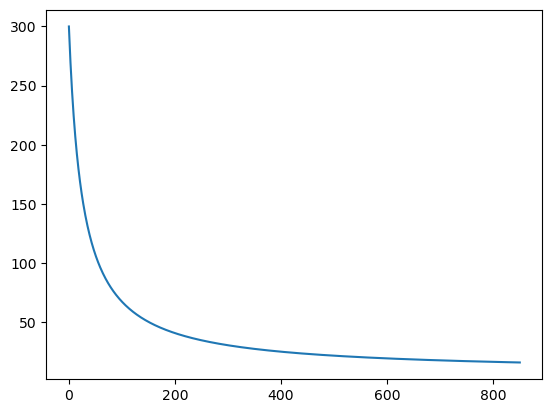

In [109]:
plt.plot(xx,yy)

### do all calculation at once

In [110]:
p0 = 0.830818 # 0.830818 gives f(120) = 65.00
ang = -80/180*np.pi
df = 300

f0 = f.subs(p,p0)
fd1 = sympy.diff(f0,x)
e1 = sympy.Eq(fd1.subs(x,0),2*np.tan(ang))
a1 = sympy.solve(e1,a)[0]
f1 = f0.subs(a,a1)
e2 = sympy.Eq(f1.subs(x,0),df)
a2 = sympy.solve(e2,c)[0]
f2 = f1.subs(c,a2)

In [111]:
xL = 850
db = 16.0

e3 = f2.subs(x,xL) - db
a3 = sympy.nsolve(e3,1)

ff = f2.subs(b,a3)
ff

297.915714263218/(0.0458259963095494*x + 1)**0.830818 + 2.08428573678191

In [112]:
func2 = sympy.lambdify(x,ff)

In [113]:
# check throat
func2(120)

65.00001571896624

Diameter at x = 120 must be near 65.0 on actual horn.

In [114]:
yy2 = func2(xx)

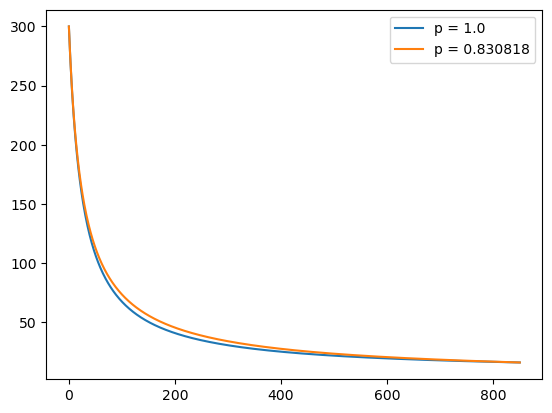

In [34]:
plt.plot(xx,yy,label = 'p = 1.0')
plt.plot(xx,yy2,label = 'p = 0.830818')
plt.legend()

In [128]:
# output data as x,y data.
import pandas as pd

In [131]:
dd = pd.DataFrame({ 'x':xx, 'y':yy2})

In [132]:
dd.head()

,x,y
0,0.0,300.000000
1,1.0,289.113541
2,2.0,279.066806
3,3.0,269.763691
4,4.0,261.122399


In [134]:
dd.to_csv('bell_20180330_xyrev.csv', index = False)

### How can you find p=830818 ?

It is farely simple.
Just run several times assuming some p value.
Then interpolate results to estimate better one.

In [115]:
from scipy.interpolate import CubicSpline

In [116]:
vpair = []

In [149]:
p0 = 0.83081841 # 0.830818 gives f(120) = 65.00
ang = -80/180*np.pi
df = 300

f0 = f.subs(p,p0)
fd1 = sympy.diff(f0,x)
e1 = sympy.Eq(fd1.subs(x,0),2*np.tan(ang))
a1 = sympy.solve(e1,a)[0]
f1 = f0.subs(a,a1)
e2 = sympy.Eq(f1.subs(x,0),df)
a2 = sympy.solve(e2,c)[0]
f2 = f1.subs(c,a2)

In [150]:
xL = 850
db = 16.0

e3 = f2.subs(x,xL) - db
a3 = sympy.nsolve(e3,1)

ff = f2.subs(b,a3)
ff

297.915697356616/(0.0458259762955167*x + 1)**0.83081841 + 2.08430264338455

In [151]:
func2 = sympy.lambdify(x,ff)

In [152]:
# check throat
func2(120)

65.0000000910751

In [153]:
vpair.append([p0, func2(120)])

Repeat calc up to this cell several times to form list of canditates.

In [154]:
vpair.sort()

In [155]:
vpair

[[0.8, 66.19684804592285],
 [0.82, 65.41506591994916],
 [0.83081652, 65.00007213190726],
 [0.83081841, 65.0000000910751],
 [0.85, 64.27723244315678]]

Make interpolation function to search a value that gives f(120) = 65.0

In [156]:
x0 = [v[0] for v in vpair]
y0 = [v[1] - 65.0 for v in vpair]

In [157]:
fintp = CubicSpline(x0,y0)

In [158]:
fintp.roots()

array([0.83081841])